In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [29]:
marks= pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
marks.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [30]:
marks.isnull == True

False

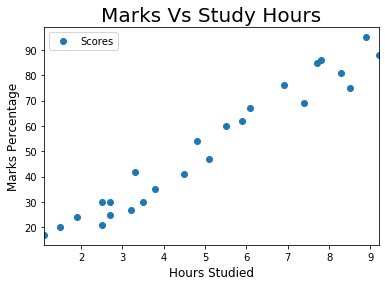

In [31]:
# plotting hours vs. percentage

marks.plot(x='Hours',y='Scores',style ='o')
plt.title('Marks Vs Study Hours',size = 20)
plt.ylabel('Marks Percentage', size = 12)
plt.xlabel('Hours Studied', size =12)
plt.show()

# From the graph we can clearly observe a strong linear relationship between the 2 variables and we can imagine a straight trend line making them ideal for Linear Regression apllication.

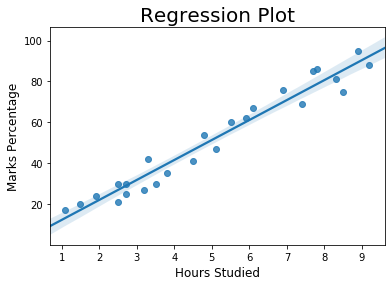

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [32]:
sns.regplot(x=marks['Hours'],y=marks['Scores'])
plt.title('Regression Plot', size=20)
plt.ylabel('Marks Percentage',size=12)
plt.xlabel('Hours Studied',size=12)
plt.show()
print(marks.corr())

In [33]:
# It is confirmed that the variables are positively correlated

# Training the model 1) Splitting the data

In [34]:
# defining X and Y from the data
X=marks.iloc[:,:-1].values
Y=marks.iloc[:,1].values

# Splitting the data in two
train_X, val_X, train_Y, val_Y = train_test_split(X,Y, random_state=0)

In [35]:
# Fitting the data into the model
regression = LinearRegression()
regression.fit(train_X,train_Y)
print("---Model Trained---")

---Model Trained---


In [36]:
# predicting the Percentage of Marks
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours':[i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [37]:
#Comparing the Predicted Marks with the Actual Marks

compare_scores = pd.DataFrame({'Actual Marks': val_Y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


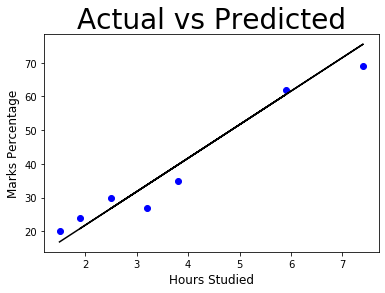

In [38]:
#Visually comparing the Predicted Marks with the Actual Marks
plt.scatter(x=val_X,y=val_Y,color='blue')
plt.plot(val_X,pred_y,color='Black')
plt.title('Actual vs Predicted',size=28)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

In [39]:
# Calculating the accuracy of the model
print('Mean Absolute Error: ', mean_absolute_error(val_Y,pred_y))

Mean Absolute Error:  4.130879918502486


In [40]:
hours = [9.25]
answer = regression.predict([hours])
print("If the student studies for 9.25 hours, he is expected to score {}".format(round(answer[0],3)))

If the student studies for 9.25 hours, he is expected to score 93.893


# Conclusion